In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '56c34526-3c73-4f7d-ac63-877b73dd30e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-02-15T14:34:04.143Z', 'error_code': 0, 'error_message': None, 'elapsed': 16, 'credit_count': 1, 'notice': None, 'total_count': 8819}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10818, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [2]:
type(data)

dict

In [8]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962869e+07,1.962869e+07,False,NaN,1,NaN,NaN,None,2024-02-15T14:33:00.000Z,52698.308768,3.571218e+10,-9.2313,0.985549,1.472021,17.324990,23.077952,26.262836,44.939848,1.034399e+12,52.5905,1.106664e+12,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201669e+08,1.201669e+08,True,NaN,2,NaN,NaN,None,2024-02-15T14:33:00.000Z,2841.386080,2.011490e+10,0.4633,1.410145,2.617497,17.296607,12.250181,28.869027,45.501512,3.414406e+11,17.3654,3.414406e+11,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
2,825,Tether USDt,USDT,tether,74681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.711679e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-15T14:32:00.000Z,1.000512,6.222608e+10,-0.4146,-0.015935,0.034229,0.052816,0.136870,0.130298,0.025141,9.716656e+10,4.9418,9.965167e+10,None,2024-02-15T14:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-15 20:09:21.479420
3,1839,BNB,BNB,bnb,2064,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495448e+08,1.495448e+08,False,NaN,4,NaN,NaN,None,2024-02-15T14:32:00.000Z,359.326129,1.291845e+09,47.5846,3.357853,7.866400,12.939118,13.427588,49.464443,47.717774,5.373535e+10,2.7329,5.373535e+10,None,2024-02-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.373897e+08,5.695402e+08,True,NaN,5,NaN,NaN,None,2024-02-15T14:33:00.000Z,116.451564,2.160988e+09,-15.0318,0.738054,-1.357637,11.536849,21.065048,62.298492,101.917555,5.093471e+10,2.5905,6.632384e+10,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-15T14:33:00.000Z,0.552027,1.466895e+09,33.0797,0.688575,3.144372,6.889175,-3.827744,-10.313465,-8.841142,3.008935e+10,1.5303,5.520275e+10,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
6,3408,USDC,USDC,usd-coin,16708,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.801141e+10,2.801141e+10,False,NaN,7,NaN,NaN,None,2024-02-15T14:33:00.000Z,1.000021,6.859996e+09,1.0522,0.009671,-0.010212,0.018370,-0.091022,-0.017205,-0.005555,2.801199e+10,1.4247,2.801199e+10,None,2024-02-15T14:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-15 20:09:21.479420
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545139e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-15T14:32:00.000Z,0.604158,6.187378e+08,18.3339,2.380003,4.527180,13.879098,12.420014,2.646788,64.089387,2.141824e+10,1.0893,2.718711e+10,None,2024-02-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000

In [20]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)


    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\harsh\OneDrive\Desktop\Amazon Web Scrapper\API.csv'):
        #df.to_csv(r'C:\Users\harsh\OneDrive\Desktop\Amazon Web Scrapper', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\harsh\OneDrive\Desktop\Amazon Web Scrapper\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Amazon Web Scrapper\API.csv')



In [21]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [ ]:
#df72 = pd.read_csv(r'C:\Users\harsh\OneDrive\Desktop\Amazon Web Scrapper\API.csv')
#df72

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.962869e+07,1.962869e+07,False,NaN,1,NaN,NaN,None,2024-02-15T14:33:00.000Z,52698.308768,3.571218e+10,-9.2313,0.985549,1.472021,17.324990,23.077952,26.262836,44.939848,1.034399e+12,52.5905,1.106664e+12,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201669e+08,1.201669e+08,True,NaN,2,NaN,NaN,None,2024-02-15T14:33:00.000Z,2841.386080,2.011490e+10,0.4633,1.410145,2.617497,17.296607,12.250181,28.869027,45.501512,3.414406e+11,17.3654,3.414406e+11,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
2,825,Tether USDt,USDT,tether,74681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.711679e+10,9.960063e+10,True,NaN,3,NaN,NaN,None,2024-02-15T14:32:00.000Z,1.000512,6.222608e+10,-0.4146,-0.015935,0.034229,0.052816,0.136870,0.130298,0.025141,9.716656e+10,4.9418,9.965167e+10,None,2024-02-15T14:32:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-15 20:09:21.479420
3,1839,BNB,BNB,bnb,2064,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495448e+08,1.495448e+08,False,NaN,4,NaN,NaN,None,2024-02-15T14:32:00.000Z,359.326129,1.291845e+09,47.5846,3.357853,7.866400,12.939118,13.427588,49.464443,47.717774,5.373535e+10,2.7329,5.373535e+10,None,2024-02-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.373897e+08,5.695402e+08,True,NaN,5,NaN,NaN,None,2024-02-15T14:33:00.000Z,116.451564,2.160988e+09,-15.0318,0.738054,-1.357637,11.536849,21.065048,62.298492,101.917555,5.093471e+10,2.5905,6.632384e+10,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.450697e+10,9.998791e+10,False,NaN,6,NaN,NaN,None,2024-02-15T14:33:00.000Z,0.552027,1.466895e+09,33.0797,0.688575,3.144372,6.889175,-3.827744,-10.313465,-8.841142,3.008935e+10,1.5303,5.520275e+10,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
6,3408,USDC,USDC,usd-coin,16708,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.801141e+10,2.801141e+10,False,NaN,7,NaN,NaN,None,2024-02-15T14:33:00.000Z,1.000021,6.859996e+09,1.0522,0.009671,-0.010212,0.018370,-0.091022,-0.017205,-0.005555,2.801199e+10,1.4247,2.801199e+10,None,2024-02-15T14:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-15 20:09:21.479420
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.545139e+10,3.662821e+10,False,NaN,8,NaN,NaN,None,2024-02-15T14:32:00.000Z,0.604158,6.187378e+08,18.3339,2.380003,4.527180,13.879098,12.420014,2.646788,64.089387,2.141824e+10,1.0893,2.718711e+10,None,2024-02-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
8,5805,Avalanche,AVAX,avalanche,664,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10818,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19628693.00000,19628693.00000,False,NaN,1,NaN,NaN,None,2024-02-15T14:33:00.000Z,52698.30877,35712180543.19064,-9.23130,0.98555,1.47202,17.32499,23.07795,26.26284,44.93985,1034398924424.28687,52.59050,1106664484125.87012,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
1,1027,Ethereum,ETH,ethereum,8410,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120166914.20327,120166914.20327,True,NaN,2,NaN,NaN,None,2024-02-15T14:33:00.000Z,2841.38608,20114899894.09640,0.46330,1.41014,2.61750,17.29661,12.25018,28.86903,45.50151,341440597334.35449,17.36540,341440597334.34998,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
2,825,Tether USDt,USDT,tether,74681,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,97116788125.71764,99600626148.56953,True,NaN,3,NaN,NaN,None,2024-02-15T14:32:00.000Z,1.00051,62226076316.60157,-0.41460,-0.01594,0.03423,0.05282,0.13687,0.13030,0.02514,97166556125.42593,4.94180,99651667003.89999,None,2024-02-15T14:32:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-02-15 20:09:21.479420
3,1839,BNB,BNB,bnb,2064,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149544797.04509,149544797.04509,False,NaN,4,NaN,NaN,None,2024-02-15T14:32:00.000Z,359.32613,1291844761.03872,47.58460,3.35785,7.86640,12.93912,13.42759,49.46444,47.71777,53735353096.88537,2.73290,53735353096.89000,None,2024-02-15T14:32:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
4,5426,Solana,SOL,solana,626,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,437389690.73963,569540165.52706,True,NaN,5,NaN,NaN,None,2024-02-15T14:33:00.000Z,116.45156,2160987681.01724,-15.03180,0.73805,-1.35764,11.53685,21.06505,62.29849,101.91755,50934713700.31373,2.59050,66323843213.81000,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
5,52,XRP,XRP,xrp,1229,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,54506969135.00000,99987912526.00000,False,NaN,6,NaN,NaN,None,2024-02-15T14:33:00.000Z,0.55203,1466895148.78630,33.07970,0.68857,3.14437,6.88917,-3.82774,-10.31346,-8.84114,30089345654.38484,1.53030,55202749541.73000,None,2024-02-15T14:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-02-15 20:09:21.479420
6,3408,USDC,USDC,usd-coin,16708,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,28011407467.05172,28011407467.05172,False,NaN,7,NaN,NaN,None,2024-02-15T14:33:00.000Z,1.00002,6859996201.62600,1.05220,0.00967,-0.01021,0.01837,-0.09102,-0.01721,-0.00555,28011990797.15398,1.42470,28011990797.15000,None,2024-02-15T14:33:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-02-15 20:09:21.479420
7,2010,Cardano,ADA,cardano,1072,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35451387770.89900,36628205944.37800,False,NaN,8,NaN,NaN,None,2024-02-15T14:32:00.000Z,0.60416,618737775.29252,18.33390,2.38000,4.52718,13.87910,12.42001,2.64679,64.08939,21418243175.42402,1.08930,27187114623.63000,None,2024-02-15T14:32:00.000Z,NaN,N

In [25]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.75293,1.31309,16.67765,23.22523,26.33606,45.89592
Ethereum,1.53806,3.21994,16.93670,12.54950,29.10497,47.31793
Tether USDt,-0.00131,0.01844,0.08156,0.10189,0.13412,0.04083
BNB,3.11689,9.29131,14.10966,15.10986,51.03105,50.54833
Solana,0.78239,-0.86304,11.85987,21.63697,62.36976,107.65435
XRP,0.59006,3.50340,7.15557,-3.31777,-10.05463,-7.35002
USDC,0.01459,0.00713,0.01894,-0.02585,-0.01142,0.00268
Cardano,1.65252,4.88970,14.24585,13.66473,3.08482,67.38408
Avalanche,1.10292,2.71753,20.06726,21.72525,4.62049,104.96127


In [26]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.75293
             quote.USD.percent_change_24h     1.31309
             quote.USD.percent_change_7d     16.67765
             quote.USD.percent_change_30d    23.22523
             quote.USD.percent_change_60d    26.33606
             quote.USD.percent_change_90d    45.89592
Ethereum     quote.USD.percent_change_1h      1.53806
             quote.USD.percent_change_24h     3.21994
             quote.USD.percent_change_7d     16.93670
             quote.USD.percent_change_30d    12.54950
             quote.USD.percent_change_60d    29.10497
             quote.USD.percent_change_90d    47.31793
Tether USDt  quote.USD.percent_change_1h     -0.00131
             quote.USD.percent_change_24h     0.01844
             quote.USD.percent_change_7d      0.08156
             quote.USD.percent_change_30d     0.10189
             quote.USD.percent_change_60d     0.13412
             quote.USD.percent_change_90

In [27]:
type(df4)

pandas.core.series.Series

In [28]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.75293
            quote.USD.percent_change_24h   1.31309
            quote.USD.percent_change_7d   16.67765
            quote.USD.percent_change_30d  23.22523
            quote.USD.percent_change_60d  26.33606
            quote.USD.percent_change_90d  45.89592
Ethereum    quote.USD.percent_change_1h    1.53806
            quote.USD.percent_change_24h   3.21994
            quote.USD.percent_change_7d   16.93670
            quote.USD.percent_change_30d  12.54950
            quote.USD.percent_change_60d  29.10497
            quote.USD.percent_change_90d  47.31793
Tether USDt quote.USD.percent_change_1h   -0.00131
            quote.USD.percent_change_24h   0.01844
            quote.USD.percent_change_7d    0.08156
            quote.USD.percent_change_30d   0.10189
            quote.USD.percent_change_60d   0.13412
            quote.USD.percent_change_90d   0.04083
BNB         quote.USD.percent_change_1h    3.11689
            quote.USD.percent_change_24h   9.29131
            quote.USD.percent_change_7d   14.10966
            quote.USD.percent_change_30d  15.10986
            quote.USD.percent_change_60d  51.03105
            quote.USD.percent_change_90d  50.54833
Solana      quote.USD.percent_change_1h    0.78239
            quote.USD.percent_change_24h  -0.86304
            quote.USD.percent_change_7d   11.85987
            quote.USD.percent_change_30d  21.63697
            quote.USD.percent_change_60d  62.36976
            quote.USD.percent_change_90d 107.65435
XRP         quote.USD.percent_change_1h    0.59006
            quote.USD.percent_change_24h   3.50340
            quote.USD.percent_change_7d    7.15557
            quote.USD.percent_change_30d  -3.31777
            quote.USD.percent_change_60d -10.05463
            quote.USD.percent_change_90d  -7.35002
USDC        quote.USD.percent_change_1h    0.01459
            quote.USD.percent_change_24h   0.00713
            quote.USD.percent_change_7d    0.01894
            quote.USD.percent_change_30d  -0.02585
            quote.USD.percent_change_60d  -0.01142
            quote.USD.percent_change_90d   0.00268
Cardano     quote.USD.percent_change_1h    1.65252
            quote.USD.percent_change_24h   4.88970
            quote.USD.percent_change_7d   14.24585
            quote.USD.percent_change_30d  13.66473
            quote.USD.percent_change_60d   3.08482
            quote.USD.percent_change_90d  67.38408
Avalanche   quote.USD.percent_change_1h    1.10292
            quote.USD.percent_change_24h   2.71753
            quote.USD.percent_change_7d   20.06726
            quote.USD.percent_change_30d  21.72525
            quote.USD.percent_change_60d   4.62049
            quote.USD.percent_change_90d 104.96127
Dogecoin    quote.USD.percent_change_1h    0.63840
            quote.USD.percent_change_24h   4.35169
            quote.USD.percent_change_7d    7.69142
            quote.USD.percent_change_30d   7.49919
            quote.USD.percent_change_60d  -7.34647
            quote.USD.percent_change_90d   6.69128
Chainlink   quote.USD.percent_change_1h    0.87112
            quote.USD.percent_change_24h   0.35950
            quote.USD.percent_change_7d    9.15571
            quote.USD.percent_change_30d  34.69061
            quote.USD.percent_change_60d  43.11900
            quote.USD.percent_change_90d  51.88927
TRON        quote.USD.percent_change_1h    0.14144
            quote.USD.percent_change_24h   1.60002
            quote.USD.percent_change_7d    6.97731
            quote.USD.percent_change_30d  21.57754
            quote.USD.percent_change_60d  27.58713
            quote.USD.percent_change_90d  27.79178
Polkadot    quote.USD.percent_change_1h    0.48030
            quote.USD.percent_change_24h   3.70388
            quote.USD.percent_change_7d   13.45216
            quote.USD.percent_change_30d   6.30879
            quote.USD.percent_change_60d  15.11167
            quo

In [29]:
df5.count()

values    90
dtype: int64

In [37]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.75293
1,Bitcoin,quote.USD.percent_change_24h,1.31309
2,Bitcoin,quote.USD.percent_change_7d,16.67765
3,Bitcoin,quote.USD.percent_change_30d,23.22523
4,Bitcoin,quote.USD.percent_change_60d,26.33606
5,Bitcoin,quote.USD.percent_change_90d,45.89592
6,Ethereum,quote.USD.percent_change_1h,1.53806
7,Ethereum,quote.USD.percent_change_24h,3.21994
8,Ethereum,quote.USD.percent_change_7d,16.93670
9,Ethereum,quote.USD.percent_change_30d,12.54950


In [38]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.75293
1,Bitcoin,quote.USD.percent_change_24h,1.31309
2,Bitcoin,quote.USD.percent_change_7d,16.67765
3,Bitcoin,quote.USD.percent_change_30d,23.22523
4,Bitcoin,quote.USD.percent_change_60d,26.33606
5,Bitcoin,quote.USD.percent_change_90d,45.89592
6,Ethereum,quote.USD.percent_change_1h,1.53806
7,Ethereum,quote.USD.percent_change_24h,3.21994
8,Ethereum,quote.USD.percent_change_7d,16.93670
9,Ethereum,quote.USD.percent_change_30d,12.54950


In [39]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.75293
1,Bitcoin,24h,1.31309
2,Bitcoin,7d,16.67765
3,Bitcoin,30d,23.22523
4,Bitcoin,60d,26.33606
5,Bitcoin,90d,45.89592
6,Ethereum,quote.USD.percent_change_1h,1.53806
7,Ethereum,24h,3.21994
8,Ethereum,7d,16.93670
9,Ethereum,30d,12.54950


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


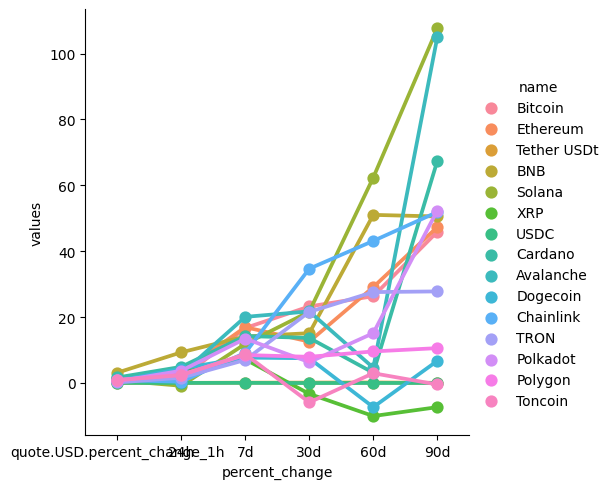

In [41]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [42]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,52698.30877,2024-02-15 20:09:21.479420
15,Bitcoin,52677.57720,2024-02-15 20:29:47.738136
30,Bitcoin,52661.12218,2024-02-15 20:30:48.922709
45,Bitcoin,52666.38033,2024-02-15 20:31:49.734020
60,Bitcoin,52670.58959,2024-02-15 20:32:50.874289
75,Bitcoin,52633.68309,2024-02-15 20:33:52.031579
90,Bitcoin,52509.74030,2024-02-15 20:34:52.920013
105,Bitcoin,52460.04790,2024-02-15 20:35:58.968098
120,Bitcoin,52294.80666,2024-02-15 20:37:00.143015


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

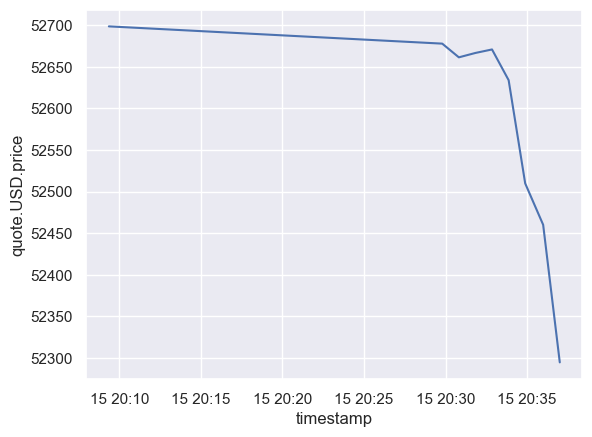

In [43]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)